# Predicting Employee Burnout

## Table of Contents
1. [Introduction](#itr) 
  * [Dataset Source](#Dataset-Source)
  * [Dataset Details](#Dataset-Details)
  * [Dataset Features](#Dataset-Features)
  * [Target Feature](#Target-Feature)
2. [Goals and Objectives](#Goals-and-Objectives)
3. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
4. [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
5. [Literature Review](#Literature-Review)
6. [Summary and Conclusion](#Summary-and-Conclusion)
7. [References](#References)

In [1]:
!pip install 'nbconvert[webpdf]'


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pyppeteer
print(pyppeteer.__version__)

1.0.2


## 1. Introduction

### 1.1 Dataset Source
The dataset utilized in this study is the 'IBM HR Analytics Employee Attrition & Performance' dataset available on Kaggle.[1] It is widely used for research in HR analytics, specifically for understanding employee attrition and fostering better retention strategies.

### 1.2 Dataset Details

In [3]:
import pandas as pd

data = pd.read_csv('data.csv')

pd.set_option('display.max_columns', None)

# Display the number of observations and the number of features
print("Number of observations:", data.shape[0])
print("Number of features:", data.shape[1])

# Display 10 random observations from the dataset
print(data.sample(10))

Number of observations: 1470
Number of features: 35
      Age Attrition     BusinessTravel  DailyRate              Department  \
1274   31        No      Travel_Rarely        196                   Sales   
1176   49        No      Travel_Rarely        301  Research & Development   
573    26       Yes      Travel_Rarely       1146                   Sales   
1211   37        No  Travel_Frequently       1278                   Sales   
939    32       Yes      Travel_Rarely       1089  Research & Development   
1277   46        No      Travel_Rarely        734  Research & Development   
544    47        No  Travel_Frequently        217                   Sales   
673    33        No      Travel_Rarely       1198  Research & Development   
441    42        No  Travel_Frequently       1474  Research & Development   
671    34        No      Travel_Rarely        546  Research & Development   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
1274                29        

The dataset provides a rich foundation for examining a wide array of HR-related questions. The data encompasses various aspects of employee information, including demographic details, job characteristics, performance metrics, and attrition status, making it invaluable for exploring the factors influencing employee turnover, job satisfaction, and organizational performance. The dataset is primarily used for predictive modeling and exploratory data analysis in the field of HR analytics.

The dataset consists of detailed employee records, each capturing attributes like age, department, role, monthly income, job satisfaction, years at the company, and many others. These features provide a comprehensive view of the employee experience and facilitate deep dives into issues like retention strategies, promotion patterns, and the impact of compensation on employee loyalty

It consists of 1470 observations and 35 features, allowing for deep analyses of factors influencing employee turnover.

### 1.3 Dataset Features
The features in our dataset are described in the table below. These descriptions are taken from the Kaggle data source.

In [4]:
from tabulate import tabulate

table = [
    ['Name', 'Data Type', 'Units', 'Description'],
    ['Age', 'Numeric', 'Years', 'Age of the employee'],
    ['Attrition', 'Binary', 'NA', 'Employee leaving the company (Yes or No)'],
    ['BusinessTravel', 'Nominal Categorical', 'NA', 'Frequency of business travel (Non-Travel, Travel-Frequently, Travel-Rarely)'],
    ['DailyRate', 'Numeric', 'Currency (USD/day)', 'Daily compensation rate of the employee'],
    ['Department', 'Nominal Categorical', 'NA', 'Department in which the employee works'],
    ['DistanceFromHome', 'Numeric', 'Miles', 'Distance from home to work location'],
    ['Education', 'Ordinal Categorical', 'NA', 'Educational level of the employee'],
    ['EducationField', 'Nominal Categorical', 'NA', 'Field of education (e.g., Life Sciences, Medical, Marketing)'],
    ['EnvironmentSatisfaction', 'Ordinal Categorical', 'NA', 'Employee satisfaction with the work environment'],
    ['Gender', 'Binary', 'NA', 'Gender of the employee (Male, Female)'],
    ['HourlyRate', 'Numeric', 'Currency (USD/hour)', 'Hourly compensation rate of the employee'],
    ['JobInvolvement', 'Ordinal Categorical', 'NA', 'Degree of the employee’s involvement in the job'],
    ['JobLevel', 'Ordinal Categorical', 'NA', 'Level of the employee’s job position'],
    ['JobRole', 'Nominal Categorical', 'NA', 'Job title of the employee'],
    ['JobSatisfaction', 'Ordinal Categorical', 'NA', 'Employee satisfaction with the job'],
    ['MaritalStatus', 'Nominal Categorical', 'NA', 'Marital status of the employee'],
    ['MonthlyIncome', 'Numeric', 'Currency (USD)', 'Monthly income of the employee'],
    ['MonthlyRate', 'Numeric', 'Currency (USD)', 'Monthly rate of compensation that can vary each month'],
    ['NumCompaniesWorked', 'Numeric', 'NA', 'Total number of companies the employee has worked for'],
    ['OverTime', 'Binary', 'NA', 'Whether the employee works overtime (Yes, No)'],
    ['PercentSalaryHike', 'Numeric', 'Percentage', 'Percentage increase in salary from the last year'],
    ['PerformanceRating', 'Ordinal Categorical', 'NA', 'Annual performance rating of the employee'],
    ['RelationshipSatisfaction', 'Ordinal Categorical', 'NA', 'Satisfaction with relationships at work'],
    ['StockOptionLevel', 'Ordinal Categorical', 'NA', 'Level of stock options assigned to the employee'],
    ['TotalWorkingYears', 'Numeric', 'Years', 'Total number of years the employee has worked'],
    ['TrainingTimesLastYear', 'Numeric', 'NA', 'Number of trainings attended last year'],
    ['WorkLifeBalance', 'Ordinal Categorical', 'NA', 'Rating of the employee’s work-life balance'],
    ['YearsAtCompany', 'Numeric', 'Years', 'Number of years the employee has worked at the company'],
    ['YearsInCurrentRole', 'Numeric', 'Years', 'Number of years in the current job role'],
    ['YearsSinceLastPromotion', 'Numeric', 'Years', 'Number of years since the last promotion'],
    ['YearsWithCurrManager', 'Numeric', 'Years', 'Number of years with the current manager']
]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════════════╤═════════════════════╤═════════════════════╤═════════════════════════════════════════════════════════════════════════════╕
│ Name                     │ Data Type           │ Units               │ Description                                                                 │
╞══════════════════════════╪═════════════════════╪═════════════════════╪═════════════════════════════════════════════════════════════════════════════╡
│ Age                      │ Numeric             │ Years               │ Age of the employee                                                         │
├──────────────────────────┼─────────────────────┼─────────────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ Attrition                │ Binary              │ NA                  │ Employee leaving the company (Yes or No)                                    │
├──────────────────────────┼─────────────────────┼─────────────────────┼──────────────────────

### 1.4 Target Feature

The target feature for this project is Employee Burnout, which is a composite index created based on factors including OverTime, JobSatisfaction, and WorkLifeBalance. This will be a binary categorical feature indicating whether an employee is at high risk (1) or low risk (0) of burnout. This feature will be constructed during the data preprocessing phase.

## 2. Goals and Objectives

The overarching aim of this project is to harness the power of HR analytics to pre-emptively identify employees who may be at risk of burnout. This has crucial implications for the health of the workforce and the overall operational efficiency of the organization. We aim to:

1. Predict Employee Burnout: Determine the likelihood of employee burnout based on key indicators drawn from HR data, such as work hours, job satisfaction, and work-life balance. 

2. Identify Key Predictors: Understand which features serve as the strongest predictors of burnout, providing insight into potential areas for organizational improvement. 

A secondary goal is to perform exploratory data analysis through descriptive statistics and visualization techniques to uncover underlying patterns and relationships after thorough data cleaning and preprocessing.

We assume that individual employee data points are independent, allowing us to use classic predictive models for our analysis without the need for more complex time-series models. This assumption simplifies the modeling process and enables us to focus on identifying patterns and relationships that can be acted upon by HR policies.

## 3. Data Cleaning & Preprocessing
In this section, we describe the data cleaning and preprocessing steps undertaken for this project.

### Data Cleaning Steps

*   Inspecting the dataset
*   Dealing with missing values
*   Data type verification and correction
*   Identifying and removing outliers
*   Correcting incorrect values
*   Dropping irrelevant features

### 3.1 Inspecting the data
First, we need to get a good understanding of the dataset. This involves checking the data types, looking for obvious data errors like negative ages, and summarizing the dataset to look for anomalies.

In [5]:
print(data.info())

print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### 3.2 Dealing with missing values
Missing values need to be handled properly, either by imputation or removal, depending on the situation.

In [6]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

Missing values per column:
Series([], dtype: int64)


Upon inspection of the dataset, we've determined that there are no missing values across all columns.

### 3.3 Data type correction
Upon initial inspection, most columns were found to have appropriate data types for their respective data. However, specific adjustments were necessary to optimize the dataset's structure for analysis:

* Age: Converted from float64 to int64 to reflect the typical representation of age in whole numbers. This change ensures accuracy in age-related calculations and simplifies demographic analysis.

* Categorical Variables: Several columns (Attrition, BusinessTravel, etc.) were converted from object to category. This conversion reduces memory usage and can potentially speed up operations involving these columns, which is particularly beneficial for large datasets.

These changes help prepare the dataset for efficient and precise analytical processing in subsequent stages of the project.

In [7]:
# Check if all ages are whole numbers by comparing them with their integer counterparts
print((data['Age'] == data['Age'].astype(int)).all())

data['Age'] = data['Age'].astype(int)

True


In [8]:
# Convert columns to 'category' data type
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 
                       'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for col in categorical_columns:
    data[col] = data[col].astype('category')

In [9]:
print(data.dtypes)

Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

### 3.4 Identifying and removing outliers
Outliers needs to be detected and handled appropriately.

In [10]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((data['Age'] < (Q1 - 1.5 * IQR)) | (data['Age'] > (Q3 + 1.5 * IQR)))

outliers = data[outlier_condition]
print(outliers)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []


The output suggests that there are no outliers in the 'Age' column of the dataset.

### 3.5 Correcting incorrect values
Now, we need to look for the incorrect values such as negative ages and correct them.

In [11]:
incorrect_values = (data['Age'] < 0)
print("Incorrect values in 'Age':", data[incorrect_values])

Incorrect values in 'Age': Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []


There are no negative age values in the dataset.

### 3.6 Dropping irrelevant columns
Unnecessary columns that don't contribute to the analysis, such as employee ID should be removed.

In [12]:
columns_to_drop = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']
data = data.drop(columns=columns_to_drop, errors='ignore') 

print(data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


## 4. Data Exploration & Visualisation
Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.

### 4.1 One-Variable Plots

### Histogram of Total Working Years

Visualizing the distribution of Total Working Years to observe the tenure spread within the company which could be a factor in burnout.

/Users/swetakarmacharya/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


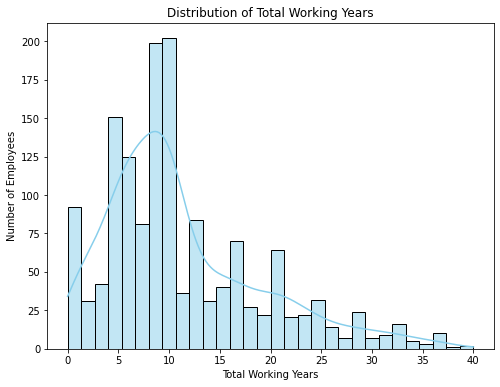

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data['TotalWorkingYears'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Number of Employees')
plt.show()

The histogram for Total Working Years shows most employees have between 5 to 10 years of experience. There’s a sharp drop as tenure increases, suggesting fewer employees remain for longer periods, which could point to mid-career burnout or a healthy churn as employees advance their careers elsewhere. Targeting the mid-tenure group for retention efforts and burnout prevention could be beneficial.

### Count Plot of Education Field

Analyzing the distribution of employees across different education fields might reveal if certain fields are more prone to stress and burnout.

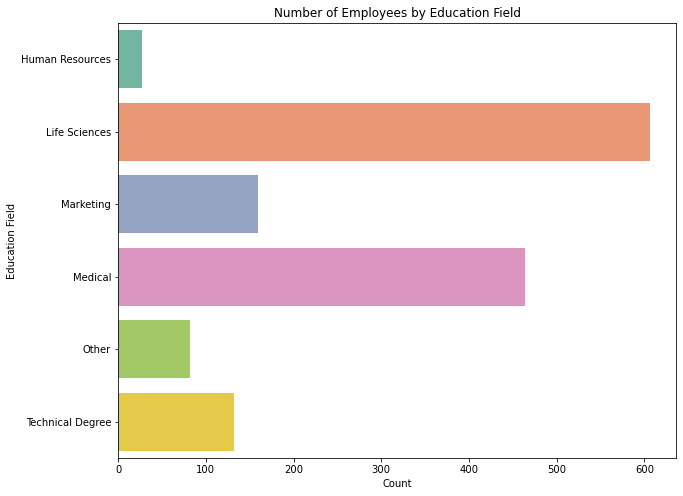

In [14]:
plt.figure(figsize=(10, 8))
sns.countplot(y='EducationField', data=data, palette='Set2')
plt.title('Number of Employees by Education Field')
plt.xlabel('Count')
plt.ylabel('Education Field')
plt.show()

The majority are from the 'Life Sciences' and 'Medical' fields, which could indicate a focus in these areas within the company. It's important to consider if these fields have unique stressors that could affect burnout rates. Fewer employees come from 'Human Resources' and 'Technical Degree' backgrounds, which might reflect specialized roles within the company.

### 4.2 Two-Variable Plots

### Boxplot of Monthly Income by Job Role

This plot helps to examine if income disparities across job roles contribute to job dissatisfaction and potential burnout.

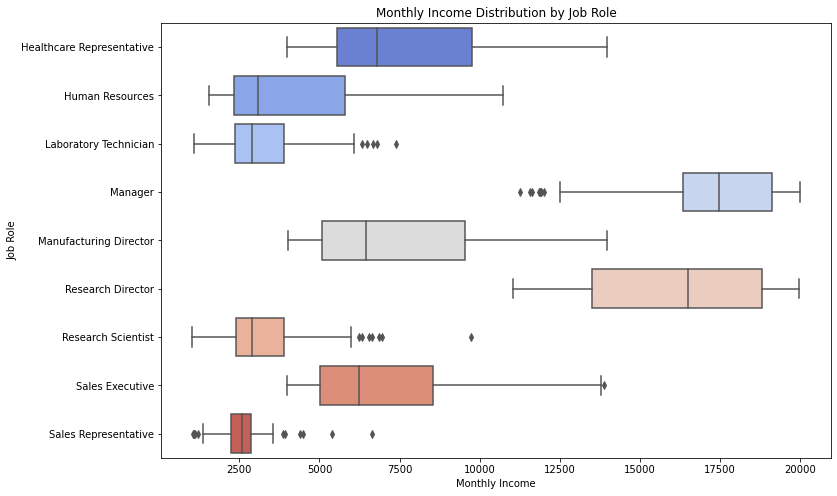

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=data, palette='coolwarm')
plt.title('Monthly Income Distribution by Job Role')
plt.xlabel('Monthly Income')
plt.ylabel('Job Role')
plt.show()

The boxplot of Monthly Income by Job Role indicates significant variance in earnings across different positions. Sales Representatives show a wide range in income, potentially reflecting commission-based pay structures. In contrast, roles like Laboratory Technician appear to have a more consistent income, suggesting a fixed salary structure. Income disparities could influence job satisfaction and stress levels, factors that are often related to burnout.

### Scatter Plot of Age vs. Monthly Income

Exploring the relationship between age and income to see if a higher income correlates with older age, which might impact work-life balance.

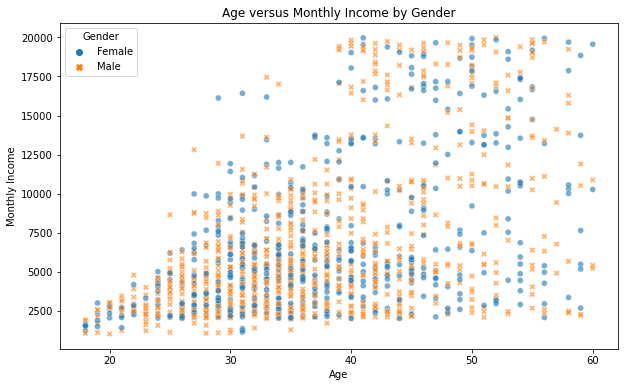

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Gender', data=data, style='Gender', alpha=0.6)
plt.title('Age versus Monthly Income by Gender')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.legend(title='Gender')
plt.show()

The scatter plot of Age vs. Monthly Income, distinguished by gender, shows a generally positive correlation between age and income, which is expected as experience often leads to higher pay. There’s no clear difference between male and female income distribution in this visualization. The plot supports the understanding that income tends to increase with age, but it does not appear to show a significant gender disparity in income. This insight is important for evaluating fair pay across the organization and understanding if income growth with age could be a factor in work-life balance, potentially affecting burnout.

### 4.3 Three-Variable Plots

### Bubble Chart of Age, Monthly Income, and Job Satisfaction

This plot will help correlate how income and age together impact job satisfaction levels, which may indicate potential stress points leading to burnout.

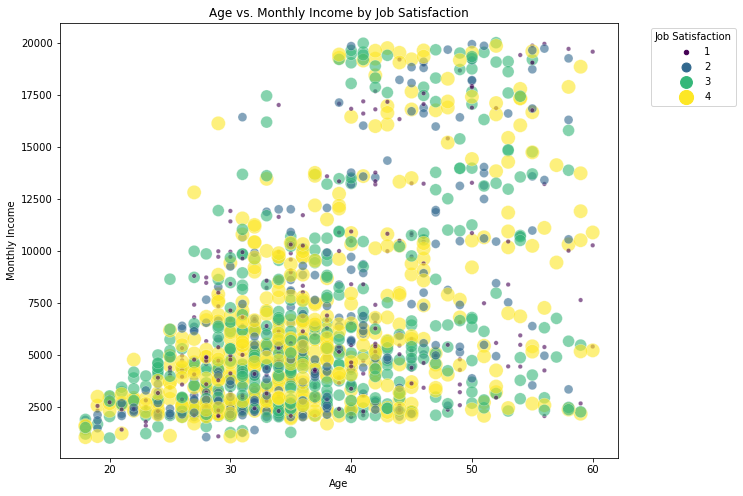

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='MonthlyIncome', size='JobSatisfaction', sizes=(20, 200), hue='JobSatisfaction', data=data, palette='viridis', alpha=0.6)
plt.title('Age vs. Monthly Income by Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The bubble chart of Age, Monthly Income, and Job Satisfaction illustrates a distribution where monthly income generally appears to increase with age, which could reflect career progression. Job satisfaction is indicated by bubble size, and larger bubbles for higher satisfaction levels seem evenly spread across different ages and incomes. This suggests that job satisfaction in this company is not solely dependent on age or income, which can be positive for addressing burnout, as it implies other factors contribute to employee contentment.

### Scatter Plot with Overlay of Performance Rating

This plot analyzes age, total working years, and performance ratings to see if long tenures are associated with higher performance, which could also correlate with stress levels.

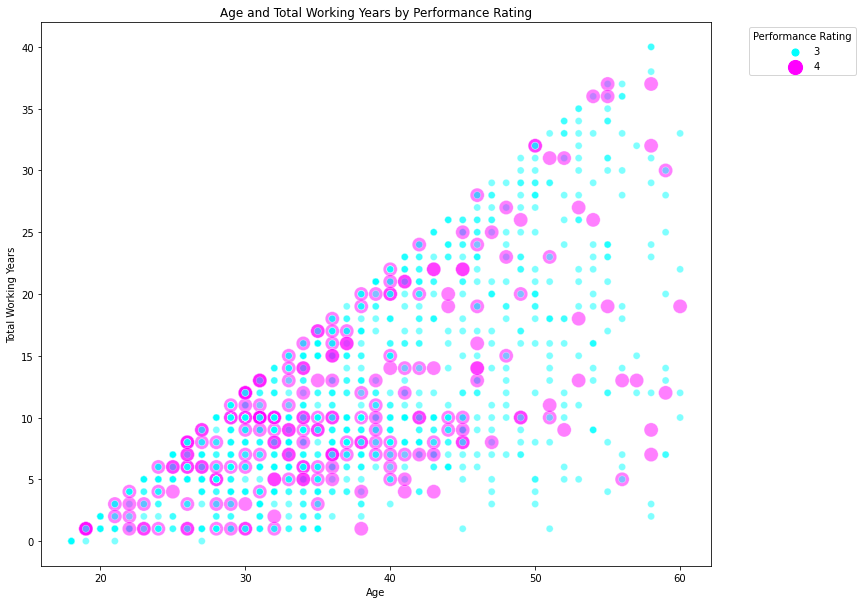

In [18]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Age', y='TotalWorkingYears', hue='PerformanceRating', size='PerformanceRating', sizes=(50, 200), data=data, palette='cool', alpha=0.5)
plt.title('Age and Total Working Years by Performance Rating')
plt.xlabel('Age')
plt.ylabel('Total Working Years')
plt.legend(title='Performance Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In the scatter plot overlaying performance rating on age and total working years, we see a general trend where performance rating does not seem to be strictly determined by age or working years. There is a mix of performance ratings across the age and working year spectrum. Higher ratings do not cluster exclusively with higher age or more years of work, suggesting that performance may be influenced by factors other than experience or tenure. This can be a positive indicator that the company values and recognizes performance based on merit, not just seniority, which can contribute to a healthier work environment and potentially lower the risk of burnout.

## 5. Literature Review
The integration of HR analytics into employee well-being management is gaining momentum in organizational practices. This literature review explores recent research on predictive modeling in HR, detection of burnout indicators, and the impact of data-driven interventions. These studies highlight the transformative potential of HR analytics in enhancing organizational health and employee satisfaction.

### 5.1 Predictive Modeling in HR Analytics
HR analytics significantly aids predictive decision-making, allowing organizations to proactively address potential employee issues, including burnout. The importance of HR analytics as a modern decision-making tool is extensively discussed in the literature, with studies demonstrating its utility in predictive modeling and risk mitigation [8][6]. Systematic reviews of HR analytics practices have emphasized the role of performance and stress indicators in effective HR strategies [2]. Conceptual frameworks proposed in the literature integrate predictive analytics to help identify early signs of burnout, underscoring the proactive capabilities of HR analytics in talent management [3].

### 5.2 Role of AI and Machine Learning
The role of artificial intelligence and machine learning in HR analytics is further highlighted by Ozakca, Bulus, and Cetin [13], who explore how AI can be used to analyze and predict employee attrition, a key factor related to burnout. Birzniece, and the team [15] also investigated the predictive modeling of HR dynamics using machine learning, supporting the view that advanced analytics can enhance predictive accuracy and managerial effectiveness.

### 5.3 Data-Driven HR Management
The efficacy of HR analytics in practical settings is examined through various case studies and empirical research. Yoon, Han, and Chae [4] utilize bibliometrics to scope out the research landscape, emphasizing the growing need for robust analytical frameworks in HR. This is complemented by Gurusinghem, Hewapattu, and Dayarathna [3], who proposed a conceptual framework for using predictive HR analytics in talent management, highlighting its potential to pre-emptively address issues like employee burnout.

### 5.4 Conference Insights on HR Analytics
The implementation and application challenges of HR analytics are discussed in conference papers by Upadhyayula, and his fellow partners [14] as well as Wirges and Neyer [9]. These papers address the practical hurdles and process-oriented understanding necessary for effective HR analytics deployment, advocating for a balanced approach that considers both technical capabilities and organizational culture. Discussions have focused on the strategic impact of HR analytics on employee health and organizational planning, highlighting its role in the future of work [12]. Additionally, the use of artificial intelligence in employee attrition analysis illustrates the advancing scope of analytics in predicting employee turnover and potentially burnout [13].

### 5.5 Global Perspectives and Ethical Considerations
Diverse international perspectives on HR analytics are offered by Boakye and Lamptey [10], who explored its implications from developing country viewpoints and in public personnel management, respectively. The article about Human Resources Analytics for Public Personnel Management has also emphasized on it.[11] These studies focus on the importance of ethical considerations and contextual sensitivity when implementing HR analytics globally.

### 5.6 Literature Review Summary
The reviewed literature collectively underscores the transformative potential of HR analytics in predicting employee burnout and enhancing organizational health. The integration of machine learning and AI into HR practices offers promising avenues for advanced predictive modeling. However, successful implementation requires overcoming technical challenges and aligning analytics initiatives with strategic organizational goals. Future research should focus on refining these predictive models and expanding their use across diverse organizational contexts.

## 6. Summary and Conclusions

The initial phase of our project focused on preparing and exploring the HR data to understand factors that might contribute to employee burnout. We cleaned the data effectively, which required minimal effort due to its already high quality. Our subsequent analysis involved visualizing key aspects of the workforce, such as age, job role, and income distributions.

The exploration and visualization component of this phase provided critical insights into the demographic and occupational characteristics of the workforce. Our univariate analysis, represented by histograms and count plots, highlighted a young workforce with a majority in the middle bracket of total working years. This finding is particularly relevant as it suggests a dynamic work environment but also underscores the need to support less experienced employees who might be more susceptible to burnout.

Bivariate analyses, such as boxplots, allowed us to compare monthly income across different job roles. These visualizations revealed variances in compensation, which could be a source of dissatisfaction and stress among employees, thereby potentially contributing to burnout. Moreover, scatter plots examining the relationship between age, monthly income, and job satisfaction, while not showing strong evidence of gender disparity in pay, did emphasize that job satisfaction is multi-faceted and not solely influenced by income or age.

Furthermore, the scatter plot with an overlay of performance ratings illustrated that high performance is spread across employees of various ages and tenure, suggesting that factors other than experience contribute to job effectiveness. This observation indicates that burnout may not be directly correlated with performance levels, a valuable insight for developing nuanced interventions.

In conclusion, these insights provided a valuable foundation for any initiatives aimed at improving employee satisfaction and retention, and they set the stage for deeper analysis in future work. This phase has equipped us with a clear understanding of the workforce dynamics, essential for addressing employee burnout effectively.

## 7. References

[1] Sengupta, P. (n.d). HR Analytics Prediction: Why do People Resign? Retrieved April 18, 2024 from https://www.kaggle.com/code/paramarthasengupta/hr-analytics-prediction-why-do-people-resign/input

[2] Espegren Y., & Hugosson M. (2023). HR analytics-as-practice: A systematic literature review. Journal of Organizational Effectiveness: People and Performance.

[3] Gurusinghe, R. N., Arachchige, B. J. H., & Dayarathna, D. (2021). Predictive HR analytics and talent management: a conceptual framework. Journal of Management Analytics, 8(2), 195–221. https://doi.org/10.1080/23270012.2021.1899857

[4] Yoon S. W., Han S.-H., & Chae C. (2023). People analytics and human resource development – Research landscape and future needs based on bibliometrics and scoping review. 
https://doi.org/10.1177/15344843231209362

[5] Mohammed, Dr. Abdul Quddus, HR Analytics: A Modern Tool in HR for Predictive Decision Making (2019). Journal of Management, 6(3), 2019, pp. 51-63, Available at SSRN: https://ssrn.com/abstract=3525328

[6] Abbracciavento F., Formentin S., Gualandi E., Nanni R., Paoli A., & Savaresi S. M. (2020). Modeling and prediction for optimal human resources management. 

[7] Francisco J., Dianna L. Stone, Ana M. Castaño, and Antonio L. García-Izquierdo. (2022). Human resources analytics: A systematic review from a sustainable management approach. University of Santiago de Compostela, Spain; University of New Mexico, USA; University of Oviedo, Spain.

[8] Abdul, Quddus & Mohammed, Abdulquddus. (2019). HR ANALYTICS: A MODERN TOOL IN HR FOR PREDICTIVE DECISION MAKING. Journal of Management. 6. 51-63. 10.34218/JOM.6.3.2019.007. 

[9] Wirges, F., Neyer, AK. Towards a process-oriented understanding of HR analytics: implementation and application. Rev Manag Sci 17, 2077–2108 (2023). https://doi.org/10.1007/s11846-022-00574-0

[10] Boakye A., Lamptey Y. A. (2020). The rise of HR analytics: Exploring its implications from a developing country perspective. Journal of Human Resource Management, 8(3), 181-189. https://doi.org/10.11648/j.jhrm.20200803.19

[11] Cho W, Choi S, Choi H. Human Resources Analytics for Public Personnel Management: Concepts, Cases, and Caveats. Administrative Sciences. 2023; 13(2):41. https://doi.org/10.3390/admsci13020041

[12] Elrehail, H. (2023). HR analytics and future of work: A systematic literature review. In Proceedings of the 2023 International Conference on Business Analytics for Technology and Security (ICBATS). IEEE.

[13] N. S. Ozakca, A. Bulus and A. Cetin, "Artificial Intelligence Based Employee Attrition Analysis and Prediction," 2024 6th International Conference on Computing and Informatics (ICCI), New Cairo - Cairo, Egypt, 2024, pp. 512-517, doi: 10.1109/ICCI61671.2024.10485157.

[14] Upadhyayula S. M., & Narayanan S. (2023). Workforce data analysis. In Proceedings of the 2023 Second International Conference On Smart Technologies For Smart Nation (SmartTechCon). IEEE.

[15] Birzniece I., Andersone I., Nikitenko A., & Zvirbule L. (2022). Predictive modeling of HR dynamics using machine learning. In Proceedings of the 2022 7th International Conference on Machine Learning Technologies (ICMLT '22) (pp. 17-23). Association for Computing Machinery. https://doi.org/10.1145/3529399.3529403
